In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

np.random.seed(42)
random_df = pd.DataFrame(np.random.random(1000).reshape([200,5]))

def some_fxn(x):
    if x < .33:
        return 'a'
    elif x >= .33 > .66:
        return 'b'
    else:
        return 'c'

random_df['letters'] = random_df[1].apply(some_fxn)
random_df['letters2'] = random_df[2].apply(some_fxn)
random_df.head()

,0,1,2,3,4,letters,letters2
0,0.374540,0.950714,0.731994,0.598658,0.156019,c,c
1,0.155995,0.058084,0.866176,0.601115,0.708073,a,c
2,0.020584,0.969910,0.832443,0.212339,0.181825,c,c
3,0.183405,0.304242,0.524756,0.431945,0.291229,a,c
4,0.611853,0.139494,0.292145,0.366362,0.456070,a,a


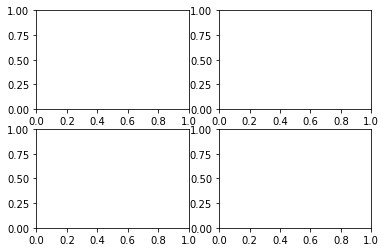

In [41]:
#creates the empty subplots where we will putting the data
fig, axes = plt.subplots(2,2)

In [42]:
ax1 = axes[0][0]
ax1.scatter(random_df[0], random_df[1], c=random_df[2])


In [43]:
ax2 = axes[0][1]
ax2 = axes[0][1]
sns.distplot(random_df[4], ax=ax2)
ax2.set_title('You can use Seaborn')
plt.figure()

In [46]:
#puts the plot in a specific subplot as above
ax3 = axes[1][0]
random_df.letters.value_counts().plot.barh(ax=ax3)
ax3.set_title("you can use Pandas plotting")
plt.show()

In [45]:
std = random_df.groupby('letters').std()

In [47]:
ax4 = axes[1][1]
random_df.groupby('letters').mean().plot.bar(ax=ax4, legend=0, yerr=std)
fig.tight_layout()
plt.show()


In [52]:
ax4 = axes[1][1]
stds = random_df.groupby('letters').std()
random_df.groupby('letters').mean().plot.bar(ax=ax4, legend=0, yerr=stds)
ax4.set_title('A bar plot with MPL')


In [53]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


/Users/cecilyleahy/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


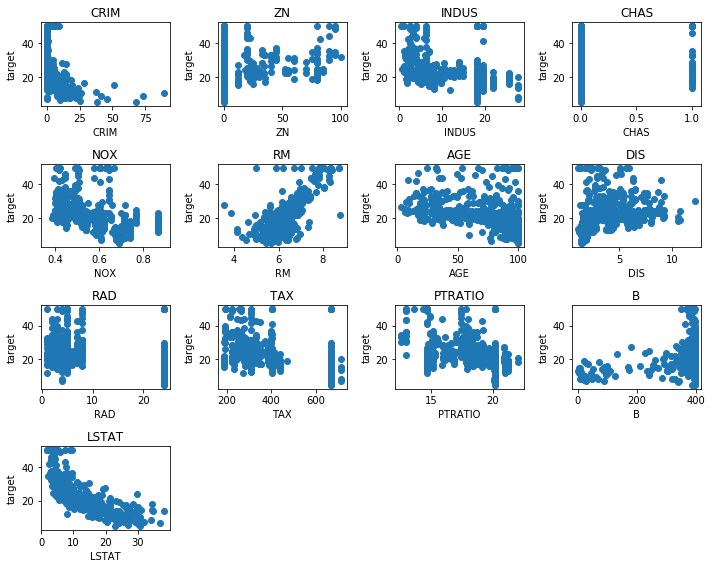

In [57]:
fig = plt.figure(figsize=(10,8))
for i, col in enumerate(X.columns):
    fig.add_subplot(4,4, 1+i)
    plt.scatter(X[col], y)
    plt.xlabel(col)
    plt.ylabel('target')
    plt.title(col)

fig.tight_layout()
fig.show()
    

/Users/cecilyleahy/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


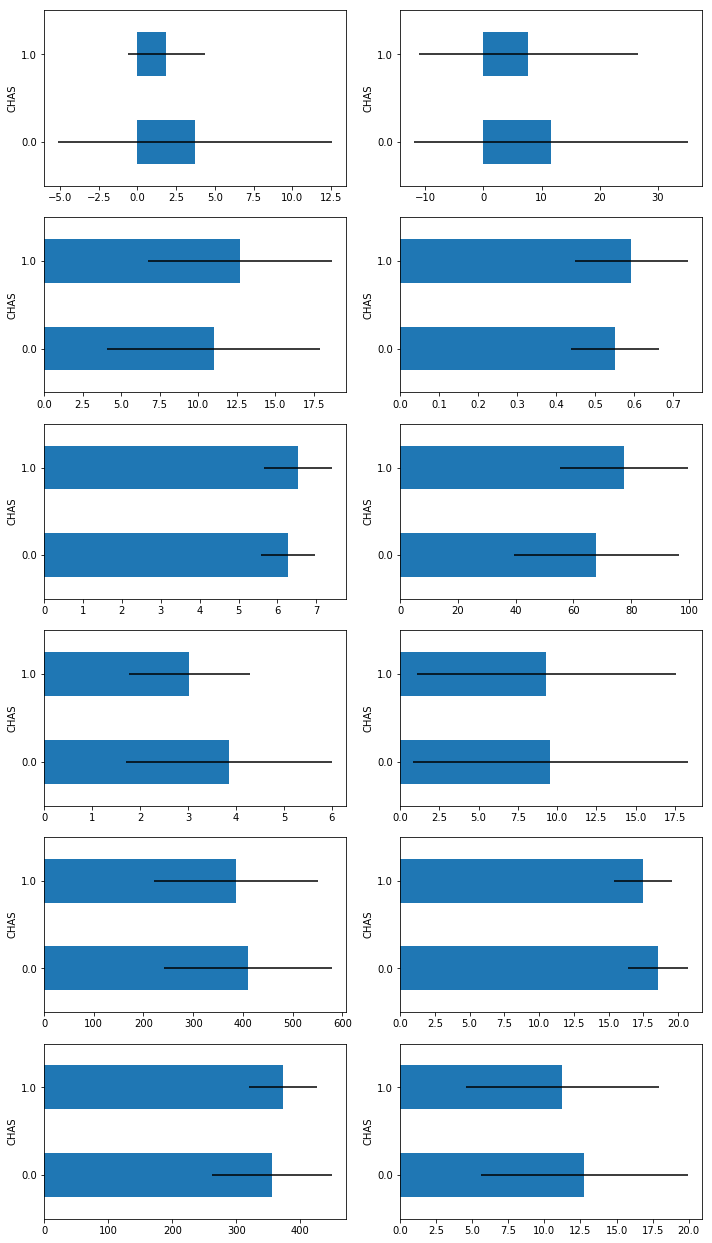

In [64]:
#visiablity 
cols_no_chas = X.columns.tolist()
cols_no_chas.remove('CHAS')

means = X.groupby('CHAS').mean()
stds = X.groupby('CHAS').std()

fig = plt.figure(figsize=(10,20))
for i, col in enumerate(cols_no_chas):
    fig.add_subplot(7, 2, 1+i)
    means[col].plot.barh(xerr = stds[col])
    
fig.tight_layout()
fig.show()

In [ ]:
cols_no_chas = [i ]